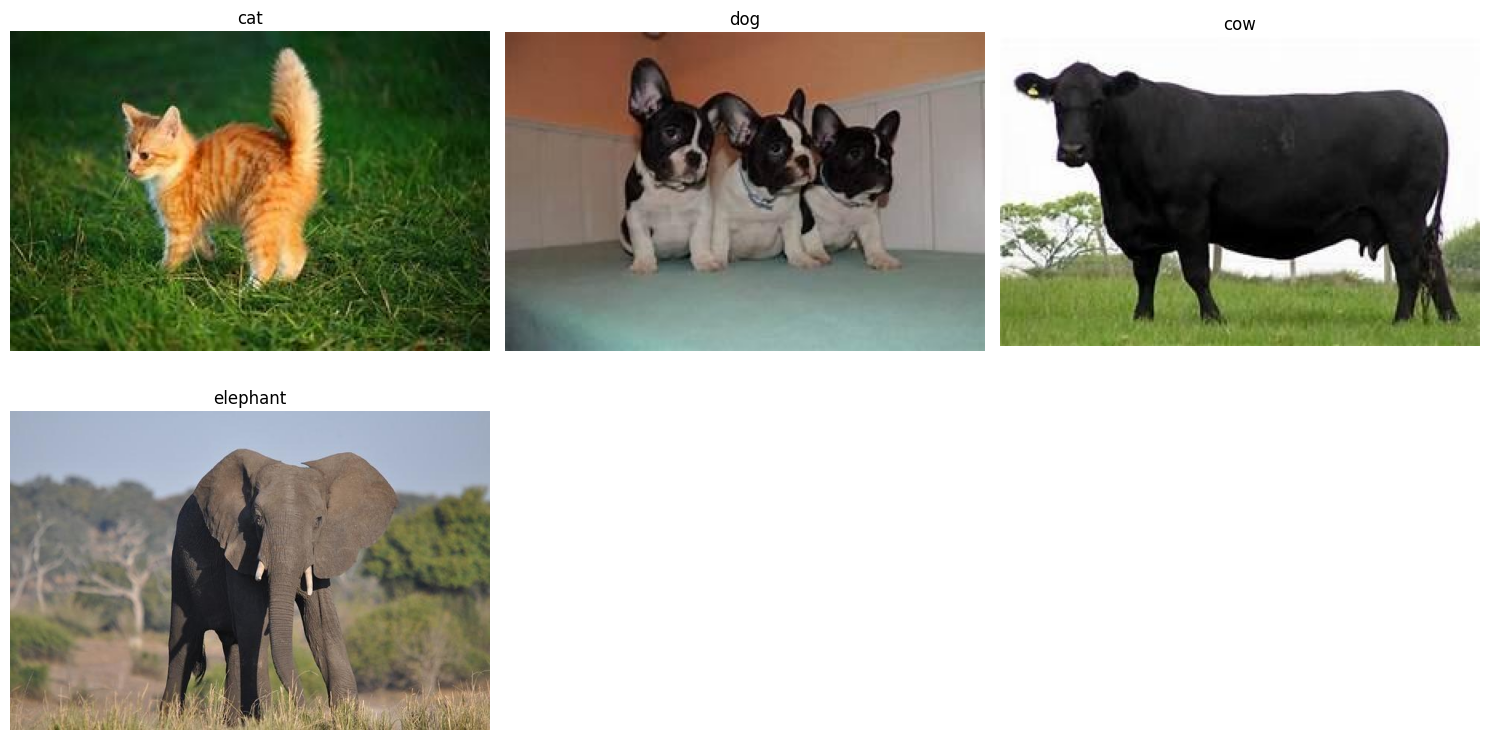


Text: There is a cow in the picture.
Image: data/animals_img_dataset/cow/OIP-0PzAhwRXt2eSfvkZS71nDAHaEw.jpeg
Result: True


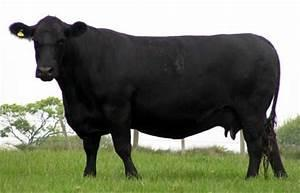

--------------------------------------------------

Text: There is an elephant in the picture.
Image: data/animals_img_dataset/cow/OIP-0PzAhwRXt2eSfvkZS71nDAHaEw.jpeg
Result: False


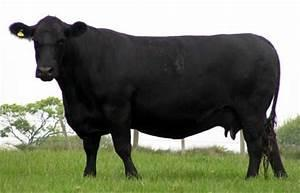

--------------------------------------------------

Text: A dog is running in the field.
Image: data/animals_img_dataset/dog/OIP-pR_hOABMzTeMRVavt4cpZQHaE6.jpeg
Result: False


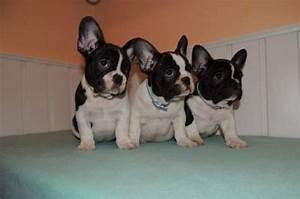

--------------------------------------------------

Text: Is there a butterfly here?
Image: data/animals_img_dataset/cat/12.jpeg
Result: False


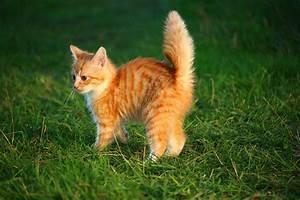

--------------------------------------------------

Text: There is no cat on that image
Image: data/animals_img_dataset/cat/1.jpeg
Result: False


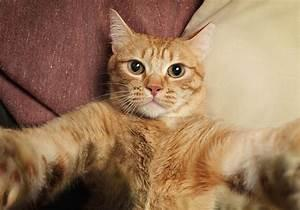

--------------------------------------------------

Text: Is there a horse and butterfly pictured?
Image: data/animals_img_dataset/horse/OIP-0CIUm0J7T6rnAupRmV4ijgHaFj.jpeg
Result: True


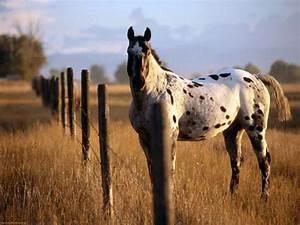

--------------------------------------------------

Text: I'm sure this pic doesn't have spider pictured on it
Image: data/animals_img_dataset/spider/e83cb30c2bf6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg
Result: False


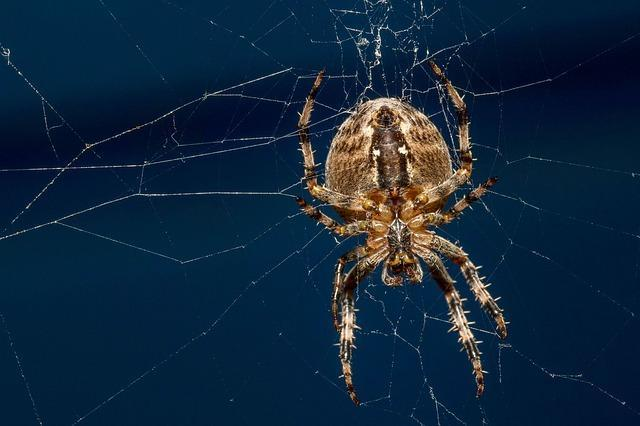

--------------------------------------------------


In [59]:
import matplotlib.pyplot as plt
from PIL import Image
from task2.src.pipeline import main as pipeline_main

def show_sample_images(image_paths, labels, rows=2, cols=3):
    plt.figure(figsize=(15, 8))
    for i, (img_path, label) in enumerate(zip(image_paths, labels)):
        plt.subplot(rows, cols, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_images = ["data/animals_img_dataset/cat/12.jpeg", "data/animals_img_dataset/dog/OIP-pR_hOABMzTeMRVavt4cpZQHaE6.jpeg", 
                 "data/animals_img_dataset/cow/OIP-0PzAhwRXt2eSfvkZS71nDAHaEw.jpeg", "data/animals_img_dataset/elephant/ea36b30921f3053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg",
                 "data/animals_img_dataset/cat/1.jpeg", "data/animals_img_dataset/horse/OIP-0CIUm0J7T6rnAupRmV4ijgHaFj.jpeg", "data/animals_img_dataset/spider/e83cb30c2bf6043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg"]
sample_labels = ["cat", "dog", "cow", "elephant"]
show_sample_images(sample_images, sample_labels)

def run_pipeline_with_args(text, image_path, confidence_threshold=0.5, target_size=(224, 224)):
    import sys
    sys.argv = [
        "pipeline.py",
        "--text", text,
        "--image_path", image_path,
        "--ner_model_dir", "models/ner_model",
        "--image_model_path", "models/image_classification_model_84_accuracy.keras",
        "--class_names_path", "data/class_names.json",
        "--confidence_threshold", str(confidence_threshold),
        "--target_size", str(target_size[0]), str(target_size[1])
    ]
    pipeline_main()


edge_cases = [
    ("There is a cow in the picture.", sample_images[2]),
    ("There is an elephant in the picture.", sample_images[2]),
    ("A dog is running in the field.", sample_images[1]),
    ("Is there a butterfly here?", sample_images[0]),
    ("There is no cat on that image", sample_images[4]),
    ("Is there a horse and butterfly pictured?", sample_images[5]),
    ("I'm sure this pic doesn't have spider pictured on it", sample_images[6])
]

for text, img_path in edge_cases:
    print(f"\nText: {text}\nImage: {img_path}")
    run_pipeline_with_args(text, img_path)
    display(Image.open(img_path))
    print("-" * 50)
